<h2 style="color:green" align="left"> Machine Learning: Regresión Logísitica</h2>

---







El algoritmo de regresión logística es un algoritmo de clasificación, ya que va a estimar valores discretos
(SI/NO, 1 ó 0, verdadero o falso) en función delas variables de entrada
(y no una distribución continua de valores como en el caso de la Regresión Lineal).

Es decir, es utilizado para predecir el resultado de una variable categórica.
Se emplea para entender la relación entre una variable dependiente categórica (que puede tomar un número limitado de categorías)
y una o más variables independientes o predictoras


La regresión logística lo que hace es "buscar" la línea que separa en dos partes las instancias (las que sí cumplen la condición objetivo y las que no). En el caso de la regresión lineal lo que se "busca" es dibujar la línea que pasa lo más cerca posible de todas las instancias.


<h3 style="color:purple">¿Diferencias entre Regresión Lineal y Regresión Logística?</h3>

## Tipos de Regresión Logística

*Regresión Logística Binaria*: la variable objetivo tiene solo dos resultados posible, Llueve o NO Llueve, Sube o Baja.

*Regresión Logística Multinomial*: la variable objetivo tiene tres o más categorías nominales, como predecir el tipo de vino.

*Regresión Logística Ordinal*: la variable objetivo tiene tres o más categorías ordinales, como clasificar un restaurante o un producto del 1 al 5.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [6]:
from google.colab import drive
drive.mount('/content/drive')    #Montar drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#obtenemos los datos
data = pd.read_csv("/content/drive/MyDrive/heart_data.csv")     # Leer csv
data.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [14]:
# UTILIZO TODAS LAS COLUMNAS DE DATOS PARA ENTRENAR EL MODELO , Y LA COLUMNA QUE ME VA A PREDECIR ES LA ÚLTIMA: 'diagnosis'

# data.iloc[<filas>, <columnas>] que se desea obtener
x=data.iloc[:,0:12].values # variable independiente... Obtengo todas las filas
y=data.iloc[:,-1].values  # todas las filas, pero sólo la última columna... mi variable a predecir es diagnosis
print(x[0:12])
print(y[:13])

[[1.06e+02 3.00e+00 0.00e+00 6.70e+01 0.00e+00 1.42e+02 0.00e+00 0.00e+00
  0.00e+00 2.23e+02 3.00e-01 0.00e+00]
 [1.20e+02 2.00e+00 0.00e+00 5.00e+01 0.00e+00 1.58e+02 0.00e+00 0.00e+00
  1.00e+00 2.19e+02 1.60e+00 0.00e+00]
 [1.26e+02 3.00e+00 2.00e+00 3.50e+01 0.00e+00 1.56e+02 1.00e+00 1.00e+00
  0.00e+00 2.82e+02 0.00e+00 2.00e+00]
 [1.50e+02 3.00e+00 2.00e+00 6.30e+01 0.00e+00 1.54e+02 0.00e+00 0.00e+00
  1.00e+00 4.07e+02 4.00e+00 2.00e+00]
 [1.40e+02 3.00e+00 2.00e+00 4.60e+01 0.00e+00 1.20e+02 1.00e+00 1.00e+00
  1.00e+00 3.11e+02 1.80e+00 0.00e+00]
 [1.10e+02 3.00e+00 1.00e+00 5.70e+01 0.00e+00 1.26e+02 1.00e+00 1.00e+00
  1.00e+00 2.01e+02 1.50e+00 0.00e+00]
 [1.30e+02 1.00e+00 0.00e+00 4.90e+01 0.00e+00 1.71e+02 0.00e+00 1.00e+00
  0.00e+00 2.66e+02 6.00e-01 0.00e+00]
 [1.36e+02 2.00e+00 0.00e+00 5.20e+01 0.00e+00 1.69e+02 0.00e+00 0.00e+00
  1.00e+00 1.96e+02 1.00e-01 2.00e+00]
 [1.10e+02 3.00e+00 2.00e+00 5.90e+01 0.00e+00 1.42e+02 1.00e+00 1.00e+00
  1.00e+00 2.39e+02 1.

**2. DIVIDIMOS**

Para ellos tenemos que usar la libreria model_selection, y su funcion train_test_split, para dividir los datos de entrenamiento y datos de prueba

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(297, 12)
(222, 12)
(75, 12)
(222,)
(75,)


In [16]:
# podemos indicar el tamaño, por defecto  0.25
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 12)
(60, 12)
(237,)
(60,)


 **3. ENTRENAMOS**

In [17]:
logReg = LogisticRegression(max_iter=1000);
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**4. REALIZAR PREDICCIONES**

In [18]:
# Hacer predicciones en el conjunto de prueba
predictions = logReg.predict(X_test)
print (predictions)

[0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0]


In [19]:
print (y_test)

[0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0]


In [20]:
# Calcular la precisión del modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [21]:
matriz=confusion_matrix(y_test,predictions)
print(matriz)

[[24  6]
 [10 20]]


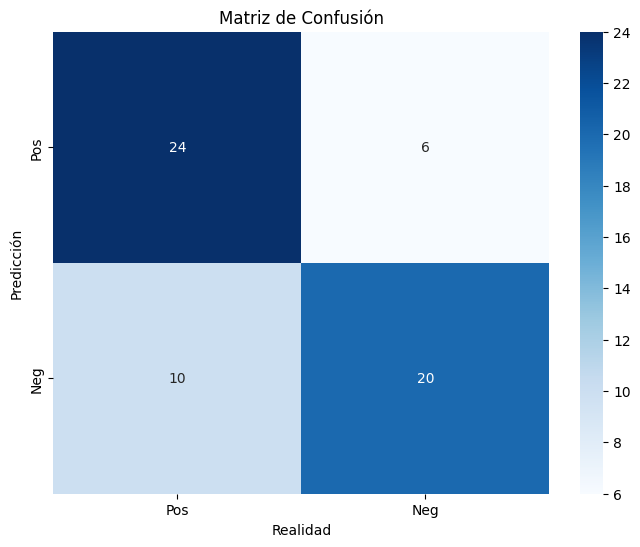

In [22]:
# Etiquetas para los ejes
xticklabels = ['Pos', 'Neg']
yticklabels = ['Pos', 'Neg']


# Crear el gráfico de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=xticklabels, yticklabels=yticklabels)

plt.xlabel('Realidad')
plt.ylabel('Predicción')

plt.title('Matriz de Confusión')
plt.show()

¿ Cuántos ha predicho mal?

Vamos a calcular la precisión del algoritmo, utlizando la librería metrics de scikit-learn *precision_score*

La Precisión era el cálculo de VP/ VP + FP, es decir, la proporción de predicciones positivas correctas...

In [23]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, predictions)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7692307692307693


Calculemos ahora la exactitud del modelo, por lo que debemos ahora importar *accuracy_score*, de la misma librería de metrics
VP + VN / TOTAL

In [24]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, predictions)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7333333333333333


In [25]:
# Calcular el recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)

print("Recall:", recall)

Recall: 0.6666666666666666
